In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

## Data PreProcessing

In [2]:
df = pd.read_csv('cases_state.csv') 
df.head()

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
0,2020-01-25,Johor,4,4,0,4,0,4,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2020-01-25,Kedah,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-25,Kelantan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,Melaka,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-25,Negeri Sembilan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Pahang, Kedah, Johor, Selangor
df = df.loc[(df['state'] == 'Pahang') | (df['state'] == 'Kedah') | (df['state'] == 'Johor') | (df['state'] == 'Selangor')]
df.head()

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
0,2020-01-25,Johor,4,4,0,4,0,4,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2020-01-25,Kedah,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-01-25,Pahang,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2020-01-25,Selangor,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2020-01-26,Johor,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Regression Model 

### Decision Tree

In [4]:
# Apply label Encoding for states
state_mapping = {'Pahang': 0, 'Kedah': 1, 'Johor': 2, 'Selangor': 3}
df['state_encoded'] = df['state'].map(state_mapping)
print(df.head())

          date     state  cases_new  cases_import  cases_recovered  \
0   2020-01-25     Johor          4             4                0   
1   2020-01-25     Kedah          0             0                0   
5   2020-01-25    Pahang          0             0                0   
11  2020-01-25  Selangor          0             0                0   
16  2020-01-26     Johor          0             0                0   

    cases_active  cases_cluster  cases_unvax  cases_pvax  cases_fvax  ...  \
0              4              0            4           0           0  ...   
1              0              0            0           0           0  ...   
5              0              0            0           0           0  ...   
11             0              0            0           0           0  ...   
16             4              0            0           0           0  ...   

    cases_5_11  cases_12_17  cases_18_29  cases_30_39  cases_40_49  \
0            0            0            0      

In [5]:
# Convert date column to datetime type
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Select required columns and set them as features
X = df[['date', 'state_encoded']].copy()
X['date'] = X['date'].astype('int64')  # Convert date to integer representation
X['state_encoded'] = X['state_encoded'].astype('int64')  # Convert state_encoded to integer

y = df['cases_new']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Create the decision tree regression model
rmDT = DecisionTreeRegressor(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(rmDT, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [7]:
# Create the decision tree regression model
rmDT = DecisionTreeRegressor(random_state=42, **best_params)

# Fit the model to the training data
rmDT.fit(X_train, y_train)

# Make predictions on the test data
rmDTpredictions = rmDT.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, rmDTpredictions)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, rmDTpredictions)

print("Mean Squared Error:", dt_mse)
print("Root Mean Squared Error:", dt_rmse)
print("R-squared score:", dt_r2)


Mean Squared Error: 61648.61064412975
Root Mean Squared Error: 248.2913825410172
R-squared score: 0.9508784664980715


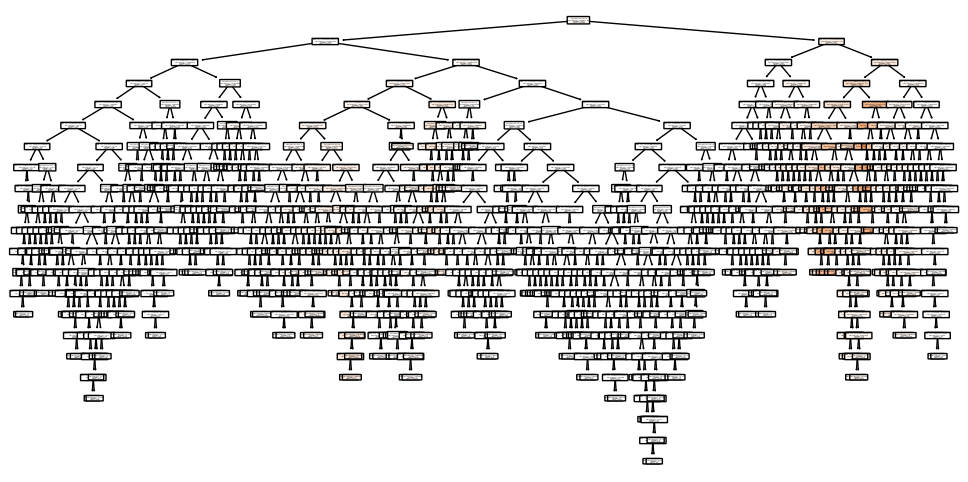

In [8]:
# Get feature names
feature_names = X.columns.tolist()

# Visualize the decision tree
plt.figure(figsize=(12, 6))
plot_tree(rmDT, feature_names=feature_names, filled=True, rounded=True)
plt.show()


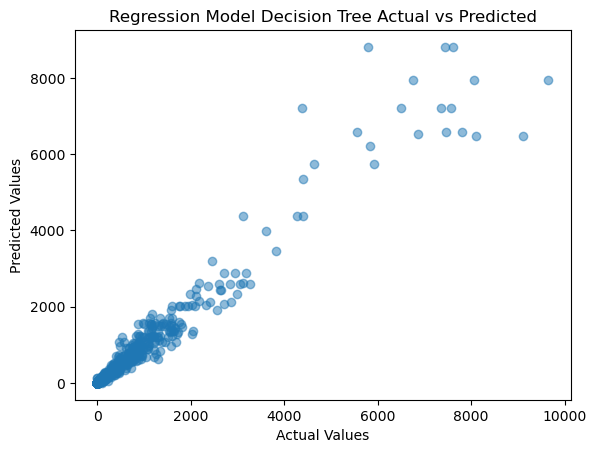

In [30]:
# Create a scatter plot of predicted values vs actual values
plt.scatter(y_test, rmDTpredictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model Decision Tree Actual vs Predicted')

# Save the plotted graph as a PNG file
plt.savefig('ActualvsPredictedRegressionDt.png')

plt.show()

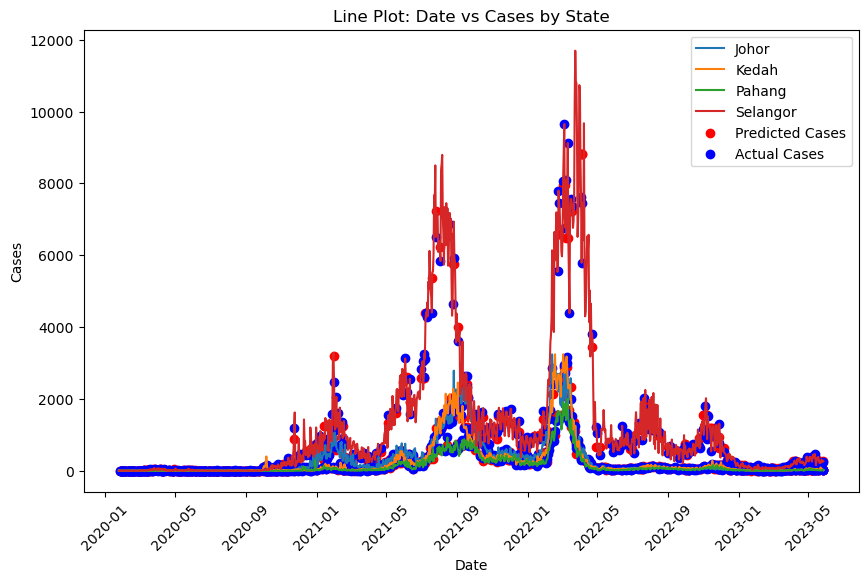

In [10]:
# Create a mapping of state names
state_names = {0: 'Pahang', 1: 'Kedah', 2: 'Johor', 3: 'Selangor'}

# Select required columns for the line plot
line_df = df[['date', 'cases_new', 'state_encoded']]

# Create a separate line plot for each state
plt.figure(figsize=(10, 6))
for state in line_df['state_encoded'].unique():
    state_data = line_df[line_df['state_encoded'] == state]
    plt.plot(state_data['date'], state_data['cases_new'], label=state_names[state])

# Plot the actual and predicted values
plt.scatter(pd.to_datetime(X_test['date'], format='%Y-%m-%d'), rmDTpredictions, label='Predicted Cases', color='red')
plt.scatter(pd.to_datetime(X_test['date'], format='%Y-%m-%d'), y_test, label='Actual Cases', color='blue')

plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Line Plot: Date vs Cases by State')
plt.xticks(rotation=45)
plt.legend()
plt.show()


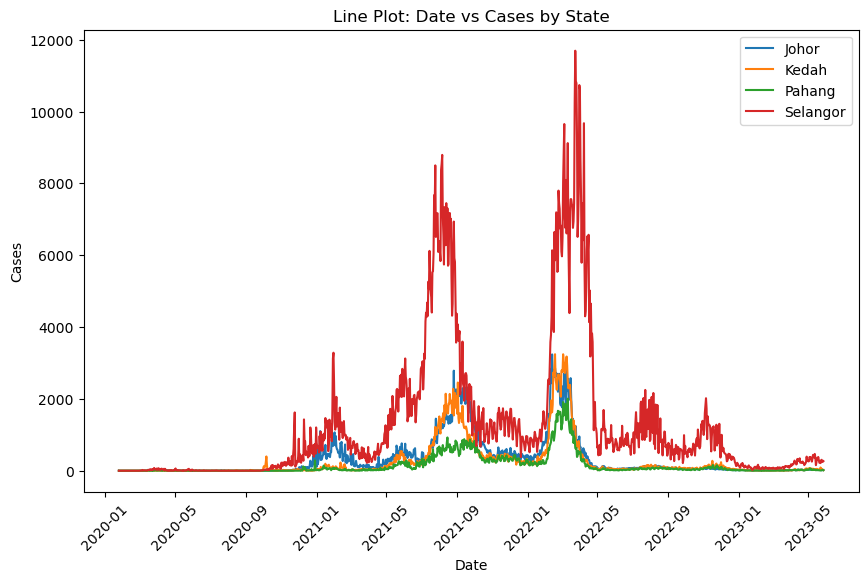

In [11]:
# Create a mapping of state names
state_names = {0: 'Pahang', 1: 'Kedah', 2: 'Johor', 3: 'Selangor'}

# Select required columns for the line plot
line_df = df[['date', 'cases_new', 'state_encoded']]

# Create a separate line plot for each state
plt.figure(figsize=(10, 6))
for state in line_df['state_encoded'].unique():
    state_data = line_df[line_df['state_encoded'] == state]
    plt.plot(state_data['date'], state_data['cases_new'], label=state_names[state])

plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('Line Plot: Date vs Cases by State')
plt.xticks(rotation=45)
plt.legend()
plt.show()

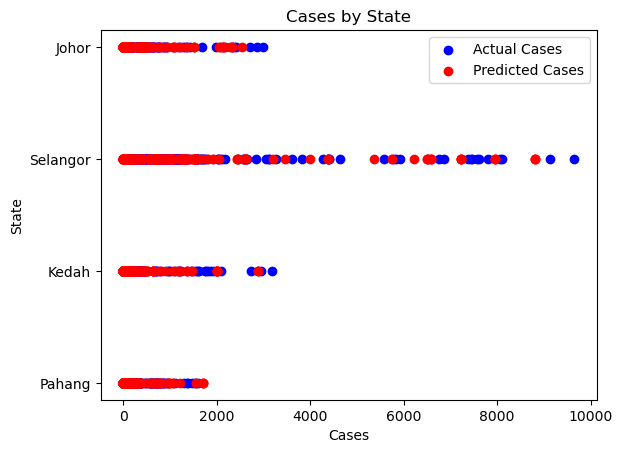

In [29]:
# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({'Actual Cases': y_test, 'Predicted Cases': rmDTpredictions})

# Merge the results with the X_test DataFrame based on the index
scatter_df = pd.concat([X_test, results_df], axis=1)

# Map state_encoded back to state names
scatter_df['State'] = scatter_df['state_encoded'].map(state_names)

# Extract state and cases data
states = scatter_df['State']
actual_cases = scatter_df['Actual Cases']
predicted_cases = scatter_df['Predicted Cases']

# Create the scatter plot
plt.scatter(actual_cases, states, label='Actual Cases', color='blue')
plt.scatter(predicted_cases, states, label='Predicted Cases', color='red')

plt.ylabel('State')
plt.xlabel('Cases')
plt.title('Cases by State')
plt.legend()
# Save the plotted graph as a PNG file
plt.savefig('ActualvsPredictedCasesbyStateRegressionDt.png')
plt.show()


### K-Neighbours

In [13]:
# Convert date column to datetime type
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Select required columns and set them as features
X = df[['date', 'state_encoded', 'cases_new']]
X['date'] = X['date'].astype('int64')  # Convert date to integer representation
X['state_encoded'] = X['state_encoded'].astype('int64')  # Convert state_encoded to integer

y = df['cases_new']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\adria\AppData\Local\Temp\ipykernel_4392\3923793976.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = X['date'].astype('int64')  # Convert date to integer representation
C:\Users\adria\AppData\Local\Temp\ipykernel_4392\3923793976.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['state_encoded'] = X['state_encoded'].astype('int64')  # Convert state_encoded to integer


In [14]:
# Define the range of values for k
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Create the KNN regression model
rmKNN = KNeighborsRegressor()

# Perform grid search to find the best value for k
grid_search = GridSearchCV(rmKNN, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best value for k
best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)

Best k: 9


In [15]:
# Create the KNN regression model
rmKNN = KNeighborsRegressor(n_neighbors=best_k)

# Fit the model to the training data
rmKNN.fit(X_train, y_train)

# Make predictions on the test data
rmKNN_predictions = rmKNN.predict(X_test)

# Evaluate the model
knn_mse = mean_squared_error(y_test, rmKNN_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, rmKNN_predictions)

print("Mean Squared Error:", knn_mse)
print("Root Mean Squared Error:", knn_rmse)
print("R-squared score:", knn_r2)


Mean Squared Error: 839016.8388484113
Root Mean Squared Error: 915.9786235761244
R-squared score: 0.3314724642201027


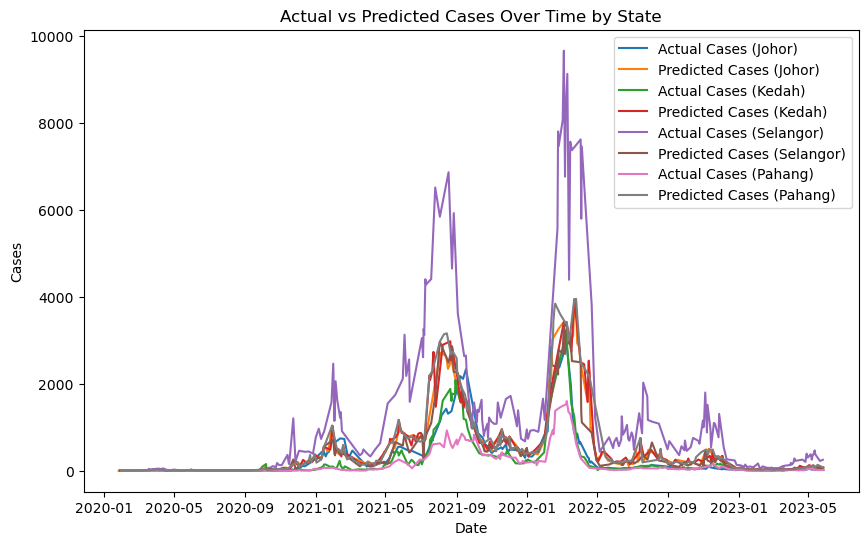

In [23]:
# Convert the integer representation of dates back to datetime
dates = pd.to_datetime(X_test['date'], format='%Y-%m-%d')

# Create a DataFrame with the actual and predicted cases
predictions = pd.DataFrame({'date': dates, 'state': X_test['state_encoded'], 'Actual Cases': y_test, 'Predicted Cases': rmKNN_predictions})

# Map state names to the encoded values
state_mapping_reverse = {v: k for k, v in state_mapping.items()}
predictions['state'] = predictions['state'].map(state_mapping_reverse)

# Group the data by date and state, and calculate the mean of actual and predicted cases for each date and state
predictions_grouped = predictions.groupby(['date', 'state']).mean().reset_index()

# Plot the line graph for each state
plt.figure(figsize=(10, 6))
states = predictions_grouped['state'].unique()
for state in states:
    state_data = predictions_grouped[predictions_grouped['state'] == state]
    plt.plot(state_data['date'], state_data['Actual Cases'], label=f'Actual Cases ({state})')
    plt.plot(state_data['date'], state_data['Predicted Cases'], label=f'Predicted Cases ({state})')

plt.xlabel('Date')
plt.ylabel('Cases')

plt.title('Actual vs Predicted Cases Over Time by State')
plt.legend()
plt.show()


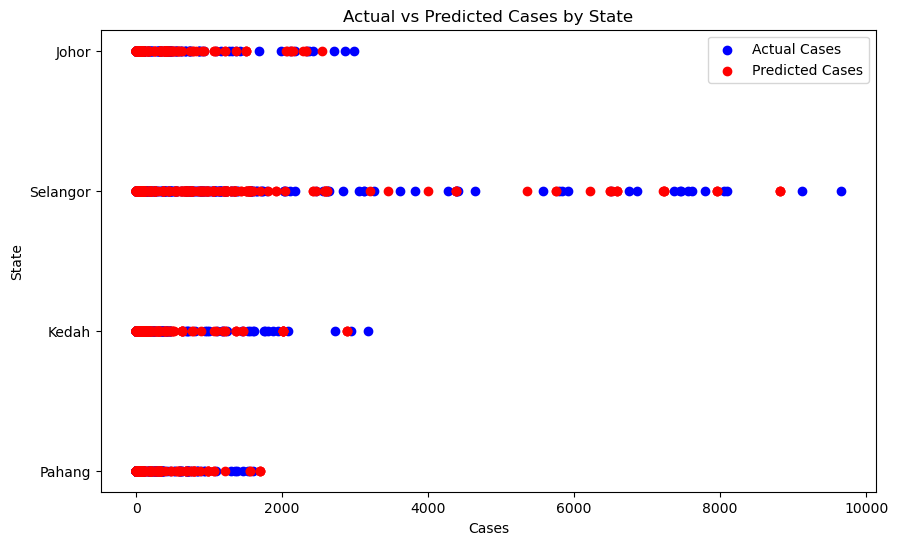

In [24]:
# Create a DataFrame with the actual and predicted cases
predictions = pd.DataFrame({'state': X_test['state_encoded'], 'Actual Cases': y_test, 'Predicted Cases': rmDTpredictions})

# Map state names to the encoded values
state_names = {0: 'Pahang', 1: 'Kedah', 2: 'Johor', 3: 'Selangor'}
predictions['state'] = predictions['state'].map(state_names)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions['Actual Cases'], predictions['state'], color='blue', label='Actual Cases')
plt.scatter(predictions['Predicted Cases'], predictions['state'], color='red', label='Predicted Cases')

plt.xlabel('Cases')
plt.ylabel('State')
plt.title('Actual vs Predicted Cases by State')

plt.legend()
plt.show()


### Comparison Model Decision Tree vs K-Neighbors

In [18]:
# Create a DataFrame to compare evaluation metrics
metrics_df = pd.DataFrame({
    'Model': ['Decision Tree', 'K Nearest Neighbors'],
    'Mean Squared Error (MSE)': [dt_mse, knn_mse],
    'Root Mean Squared Error (RMSE)': [dt_rmse, knn_rmse],
    'R-squared Score (R2)': [dt_r2, knn_r2]
})

metrics_df.sort_values('Mean Squared Error (MSE)', ascending=False)
print(metrics_df)

                 Model  Mean Squared Error (MSE)  \
0        Decision Tree              61648.610644   
1  K Nearest Neighbors             839016.838848   

   Root Mean Squared Error (RMSE)  R-squared Score (R2)  
0                      248.291383              0.950878  
1                      915.978624              0.331472  


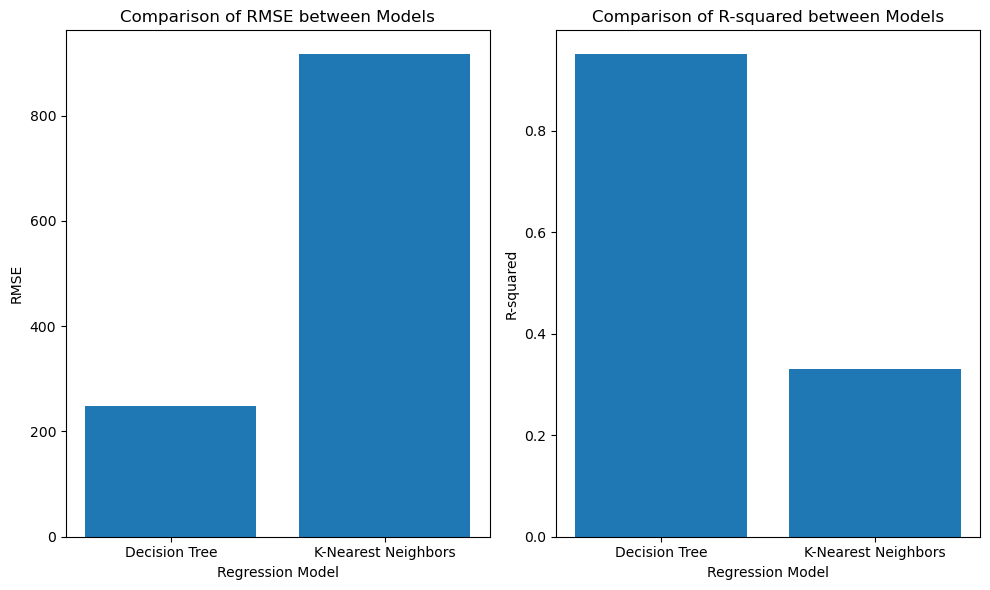

In [20]:
# Create a bar plot to compare the models
labels = ['Decision Tree', 'K-Nearest Neighbors']
rmse_scores = [dt_rmse, knn_rmse]
r2_scores = [dt_r2, knn_r2]

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(labels, rmse_scores)
plt.xlabel('Regression Model')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE between Models')

plt.subplot(1, 2, 2)
plt.bar(labels, r2_scores)
plt.xlabel('Regression Model')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared between Models')
# Save the plotted graph as a PNG file
plt.savefig('ComparisonBetweenRegressionModels.png')

plt.tight_layout()
plt.show()

The Decision tree has lower RMSE value than KNN. We can also see that the decision tree has a higher R-squared value. This means that the dicision treee is the best model for this dataset for the regression model.